In [1]:
import pandas as pd
import numpy as np
from netCDF4 import Dataset, num2date
import nctoolkit as nc
import matplotlib.pyplot as plt


nctoolkit is using Climate Data Operators version 2.3.0


In [2]:
from plot_functions import data_manipulation
data_path  = '/Users/charliecameron/CodingHub/Uni/Data_driven_processes/Data_modelling/data_sets/data_aus.nc'
#Now we can create an instance using the data_manipulation class
data_class = data_manipulation(data_path)


Plotting the bounds for the region

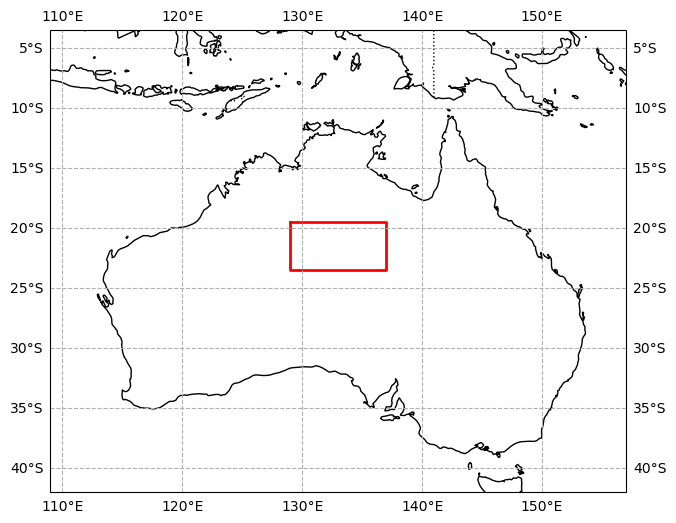

In [3]:
data_class.geo_plot()

We can also plot the rainfall data in this region for any index (which ranges in dates)

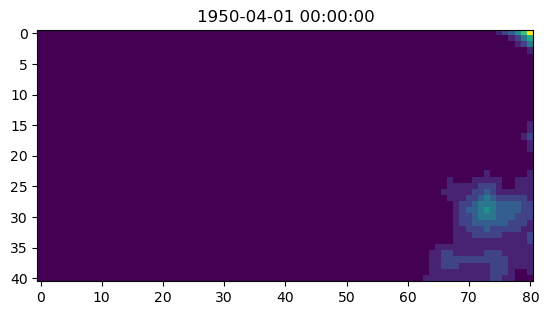

The rainfall data in this region for date: 1950-04-01 00:00:00


In [4]:
data_class.rain_plot(3)

Extracting the metadata, this contains the years of recorded data and also the range of longitude and latitude values

In [5]:
data_class.metadata['lon'] #THis contains values for the latitude/longitude and the times in gregorian format and also month/year format

masked_array(data=[129. , 129.1, 129.2, 129.3, 129.4, 129.5, 129.6, 129.7,
                   129.8, 129.9, 130. , 130.1, 130.2, 130.3, 130.4, 130.5,
                   130.6, 130.7, 130.8, 130.9, 131. , 131.1, 131.2, 131.3,
                   131.4, 131.5, 131.6, 131.7, 131.8, 131.9, 132. , 132.1,
                   132.2, 132.3, 132.4, 132.5, 132.6, 132.7, 132.8, 132.9,
                   133. , 133.1, 133.2, 133.3, 133.4, 133.5, 133.6, 133.7,
                   133.8, 133.9, 134. , 134.1, 134.2, 134.3, 134.4, 134.5,
                   134.6, 134.7, 134.8, 134.9, 135. , 135.1, 135.2, 135.3,
                   135.4, 135.5, 135.6, 135.7, 135.8, 135.9, 136. , 136.1,
                   136.2, 136.3, 136.4, 136.5, 136.6, 136.7, 136.8, 136.9,
                   137. ],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

The class will also be able to store the total rainfall over the entire region and approximate the average rainfall per km^2

In [6]:
total_df = data_class.total_rainfall
total_df.head(20)

,rf_mm,date,mm_km2,month_number,month
0,1078.464995,1950-01,0.002900,1,January
1,5346.651299,1950-02,0.014376,2,February
2,2622.447261,1950-03,0.007051,3,March
3,3.186172,1950-04,0.000009,4,April
4,1394.179021,1950-05,0.003749,5,May
5,3050.147176,1950-06,0.008201,6,June
6,57.878776,1950-07,0.000156,7,July
7,6.339371,1950-08,0.000017,8,August
8,97.673755,1950-09,0.000263,9,September
9,1266.579754,1950-10,0.003406,10,October


In [25]:
# Group by 'Month_number' and calculate the mean of 'Total Rainfall mm' for each month
monthly_mean = total_df.groupby('month_number')['rf_mm'].mean()

# Create a DataFrame from the resulting Series with specified column names
monthly_mean_df = pd.DataFrame({
    'Month_number': monthly_mean.index,
    'Monthly_Mean_Rainfall_mm': monthly_mean.values
})

# Display the DataFrame

In [26]:
monthly_mean_df.head(5)


,Month_number,Monthly_Mean_Rainfall_mm
0,1,7837.657750
1,2,8217.035487
2,3,3979.484424
3,4,1429.422154
4,5,1617.778599


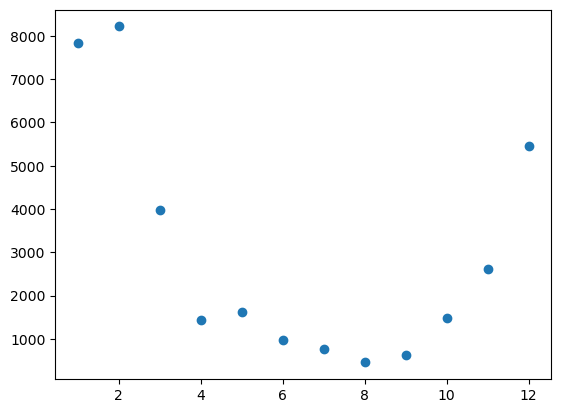

In [27]:
plt.figure()
plt.plot(monthly_mean_df['Month_number'], monthly_mean_df['Monthly_Mean_Rainfall_mm'],'o')